In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


Hr analytics help us to improve workforce processes and promote a positive employee experience. Attrition is basically the gradual reduction
of employees as they leave or are not replaced. This is the major issue industry faces and leads to a great impact in the business world. Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

In [3]:
#read the dataset through head method

data = pd.read_csv(r'https://raw.githubusercontent.com/Jyotsnajha12345/My-coding/main/Project_phase_3/WA_Fn-UseC_-HR-Employee-Attrition.csv?token=GHSAT0AAAAAACK5DPKHR3Q73SDFZ2DI7NZUZLOBX6A')
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.isna().sum() #we can see that there are no nulls so we could proceed further.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:

data.drop(['EmployeeNumber'],axis=1,inplace=True)
data.drop(['EmployeeCount'],axis=1,inplace=True)
data.drop(['StandardHours'],axis=1,inplace=True)
data.drop(['Over18'],axis=1,inplace=True)
data.drop(['DailyRate'],axis=1,inplace=True)
data.drop(['HourlyRate'],axis=1,inplace=True)
data.drop(['MonthlyRate'],axis=1,inplace=True)
data.drop(['NumCompaniesWorked'],axis=1,inplace=True)
data.drop(['YearsWithCurrManager'],axis=1,inplace=True)
data.drop(['YearsSinceLastPromotion'],axis=1,inplace=True)


drop the columns which are no longer needed. employeenumber has unique identity so it is more like that it dont affect the attrition
so we could drop it. Employee count and standardhours are almost same for each employee so it will not impact anything for our prediction
rest of the features also doesn't show any direct relation with attrition so we could drop it off.

In [10]:
data.shape

(1470, 25)

In [11]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,0,8,0,1,6,4
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,10,3,3,10,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,0,7,3,3,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,0,8,3,3,8,7
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,1,6,3,3,2,2


In [14]:
data['Attrition'].replace('No', 0,inplace=True)
data['Attrition'].replace('Yes', 1,inplace=True) #replacing the categorical data 


In [15]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,0,8,0,1,6,4
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,1,10,3,3,10,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,0,7,3,3,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,0,8,3,3,8,7
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,1,6,3,3,2,2


In [16]:
#generating dummy values on the data dataset
data= pd.get_dummies(data).astype(int)
data.head()


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,2,2,3,2,4,5993,11,...,0,0,0,1,0,0,0,1,0,1
1,49,0,8,1,3,2,2,2,5130,23,...,0,0,1,0,0,0,1,0,1,0
2,37,1,2,2,4,2,1,3,2090,15,...,0,0,0,0,0,0,0,1,0,1
3,33,0,3,4,4,3,1,3,2909,11,...,0,0,1,0,0,0,1,0,0,1
4,27,0,2,1,1,3,1,2,3468,12,...,0,0,0,0,0,0,1,0,1,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int32
 1   Attrition                          1470 non-null   int32
 2   DistanceFromHome                   1470 non-null   int32
 3   Education                          1470 non-null   int32
 4   EnvironmentSatisfaction            1470 non-null   int32
 5   JobInvolvement                     1470 non-null   int32
 6   JobLevel                           1470 non-null   int32
 7   JobSatisfaction                    1470 non-null   int32
 8   MonthlyIncome                      1470 non-null   int32
 9   PercentSalaryHike                  1470 non-null   int32
 10  PerformanceRating                  1470 non-null   int32
 11  RelationshipSatisfaction           1470 non-null   int32
 12  StockOptionLevel    

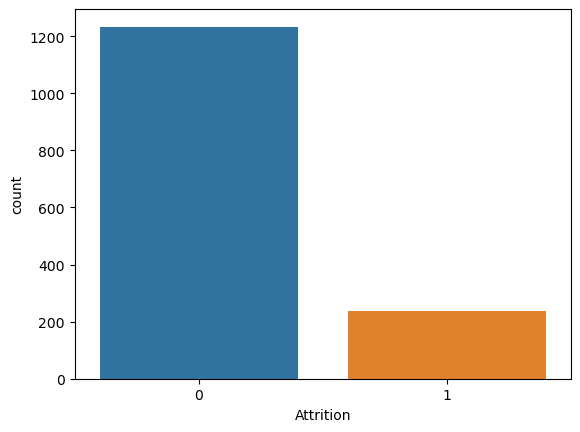

In [19]:
sns.countplot(x='Attrition', data=data)
plt.show()


Through this chart we could see that there are more no of employee who have not faced attrition

In [20]:
cor = data.corr()
cor


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,1.000000,-0.159205,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.003634,...,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,-0.028062,0.028062
Attrition,-0.159205,1.000000,0.077924,-0.031373,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,-0.013478,...,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419,-0.246118,0.246118
DistanceFromHome,-0.001686,0.077924,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,0.040235,...,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,-0.025514,0.025514
Education,0.208034,-0.031373,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,-0.011111,...,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,0.020322,-0.020322
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,-0.031701,...,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,-0.070132,0.070132
JobInvolvement,0.029820,-0.130016,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,-0.017205,...,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253,0.003507,-0.003507
JobLevel,0.509604,-0.169105,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,-0.034730,...,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.037087,0.050547,-0.087072,-0.000544,0.000544
JobSatisfaction,-0.004892,-0.103481,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,0.020002,...,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.015197,-0.010315,0.024571,-0.024539,0.024539
MonthlyIncome,0.497855,-0.159840,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,-0.027269,...,0.055684,0.485818,-0.345180,0.047792,-0.201514,0.032203,0.056767,-0.089361,-0.006089,0.006089
PercentSalaryHike,0.003634,-0.013478,0.040235,-0.011111,-0.031701,-0.017205,-0.034730,0.020002,-0.027269,1.000000,...,0.034682,-0.017017,0.032537,-0.046683,0.031102,-0.023478,0.020895,-0.001386,0.005433,-0.005433


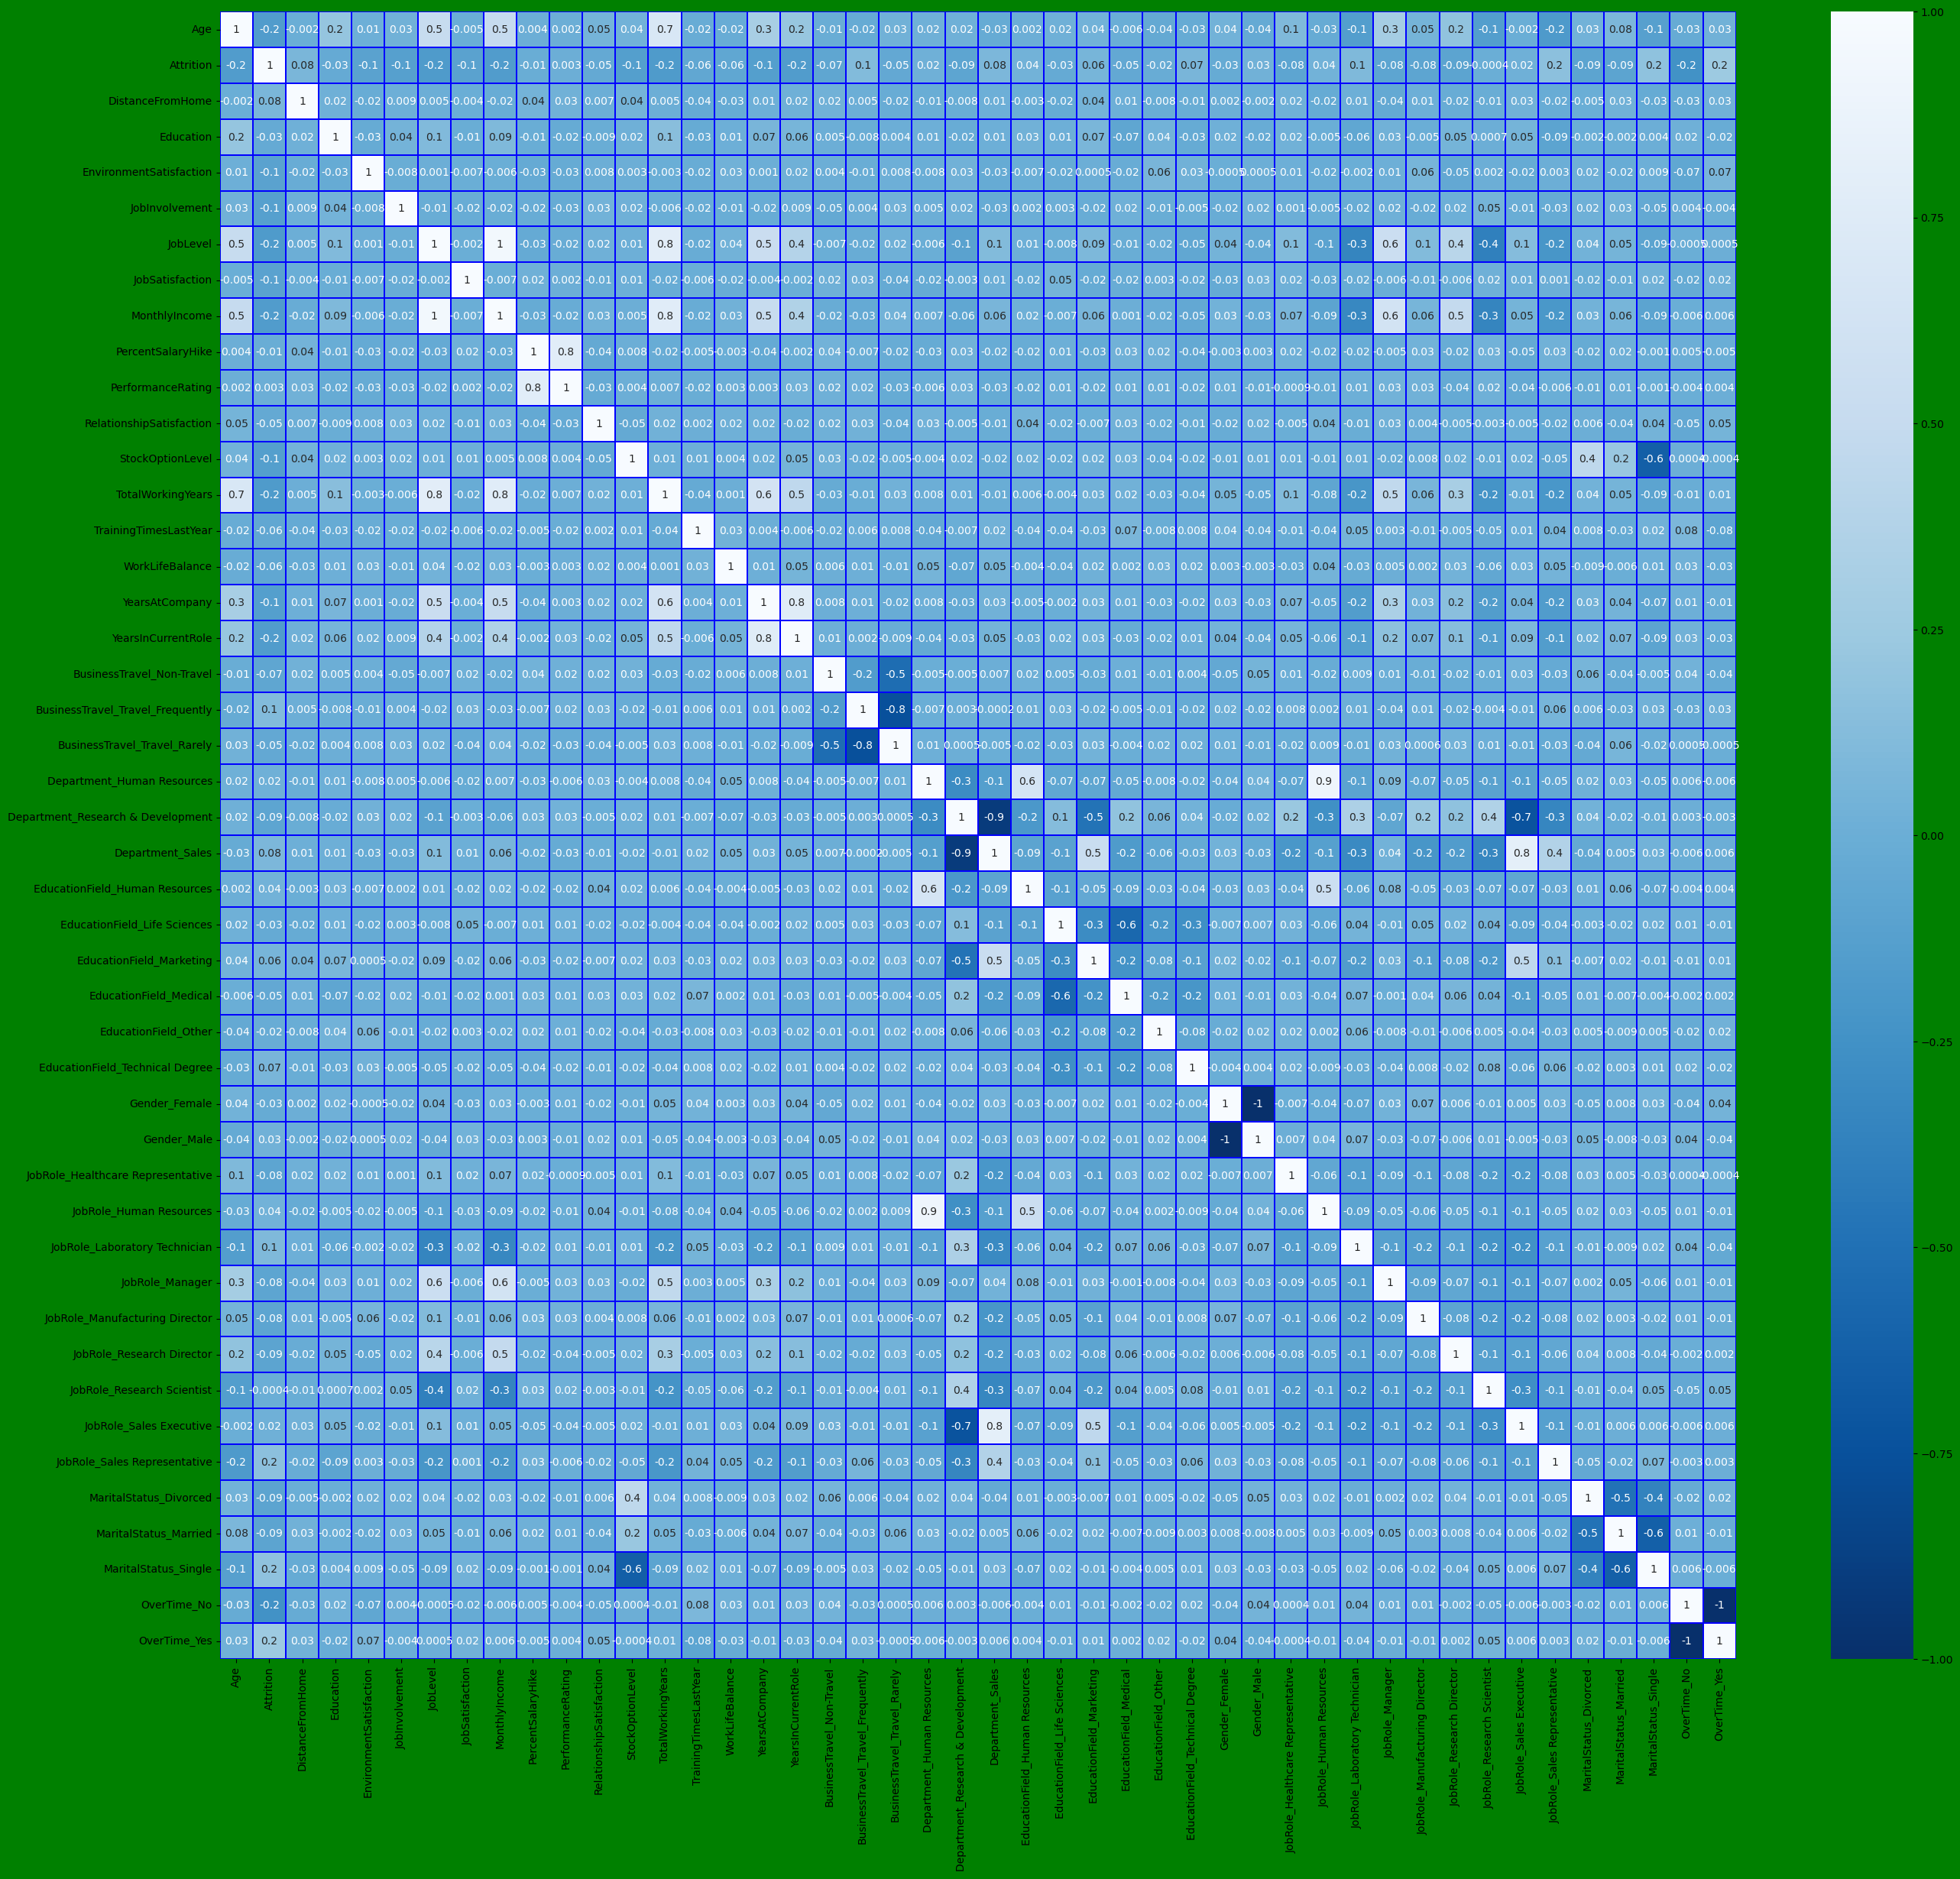

In [22]:
plt.figure(figsize=(32,28), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'b', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

We could not find multicollinearity issue the data is likely to be balanced. The features that  are more related to the target variable Attrition: EnvironmentSatisfaction, JobInvolvement, Job level, JobSatisfaction, MonthlyIncome, StockOptionalLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearswithManager.



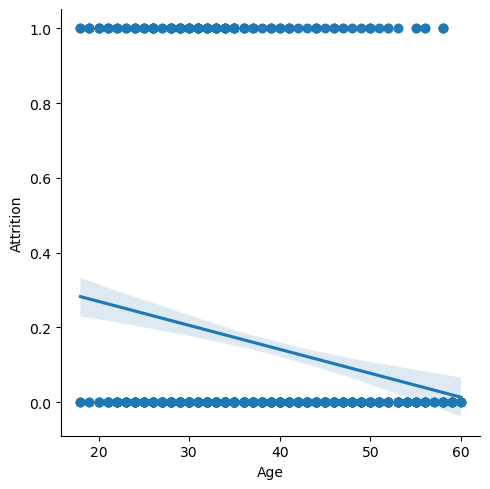

In [24]:
sns.lmplot(x='Age',y='Attrition',data=data,palette='colorblind')


From the above chart we could see that the higher the age the lesser the attrition

In [25]:
data.shape

(1470, 46)

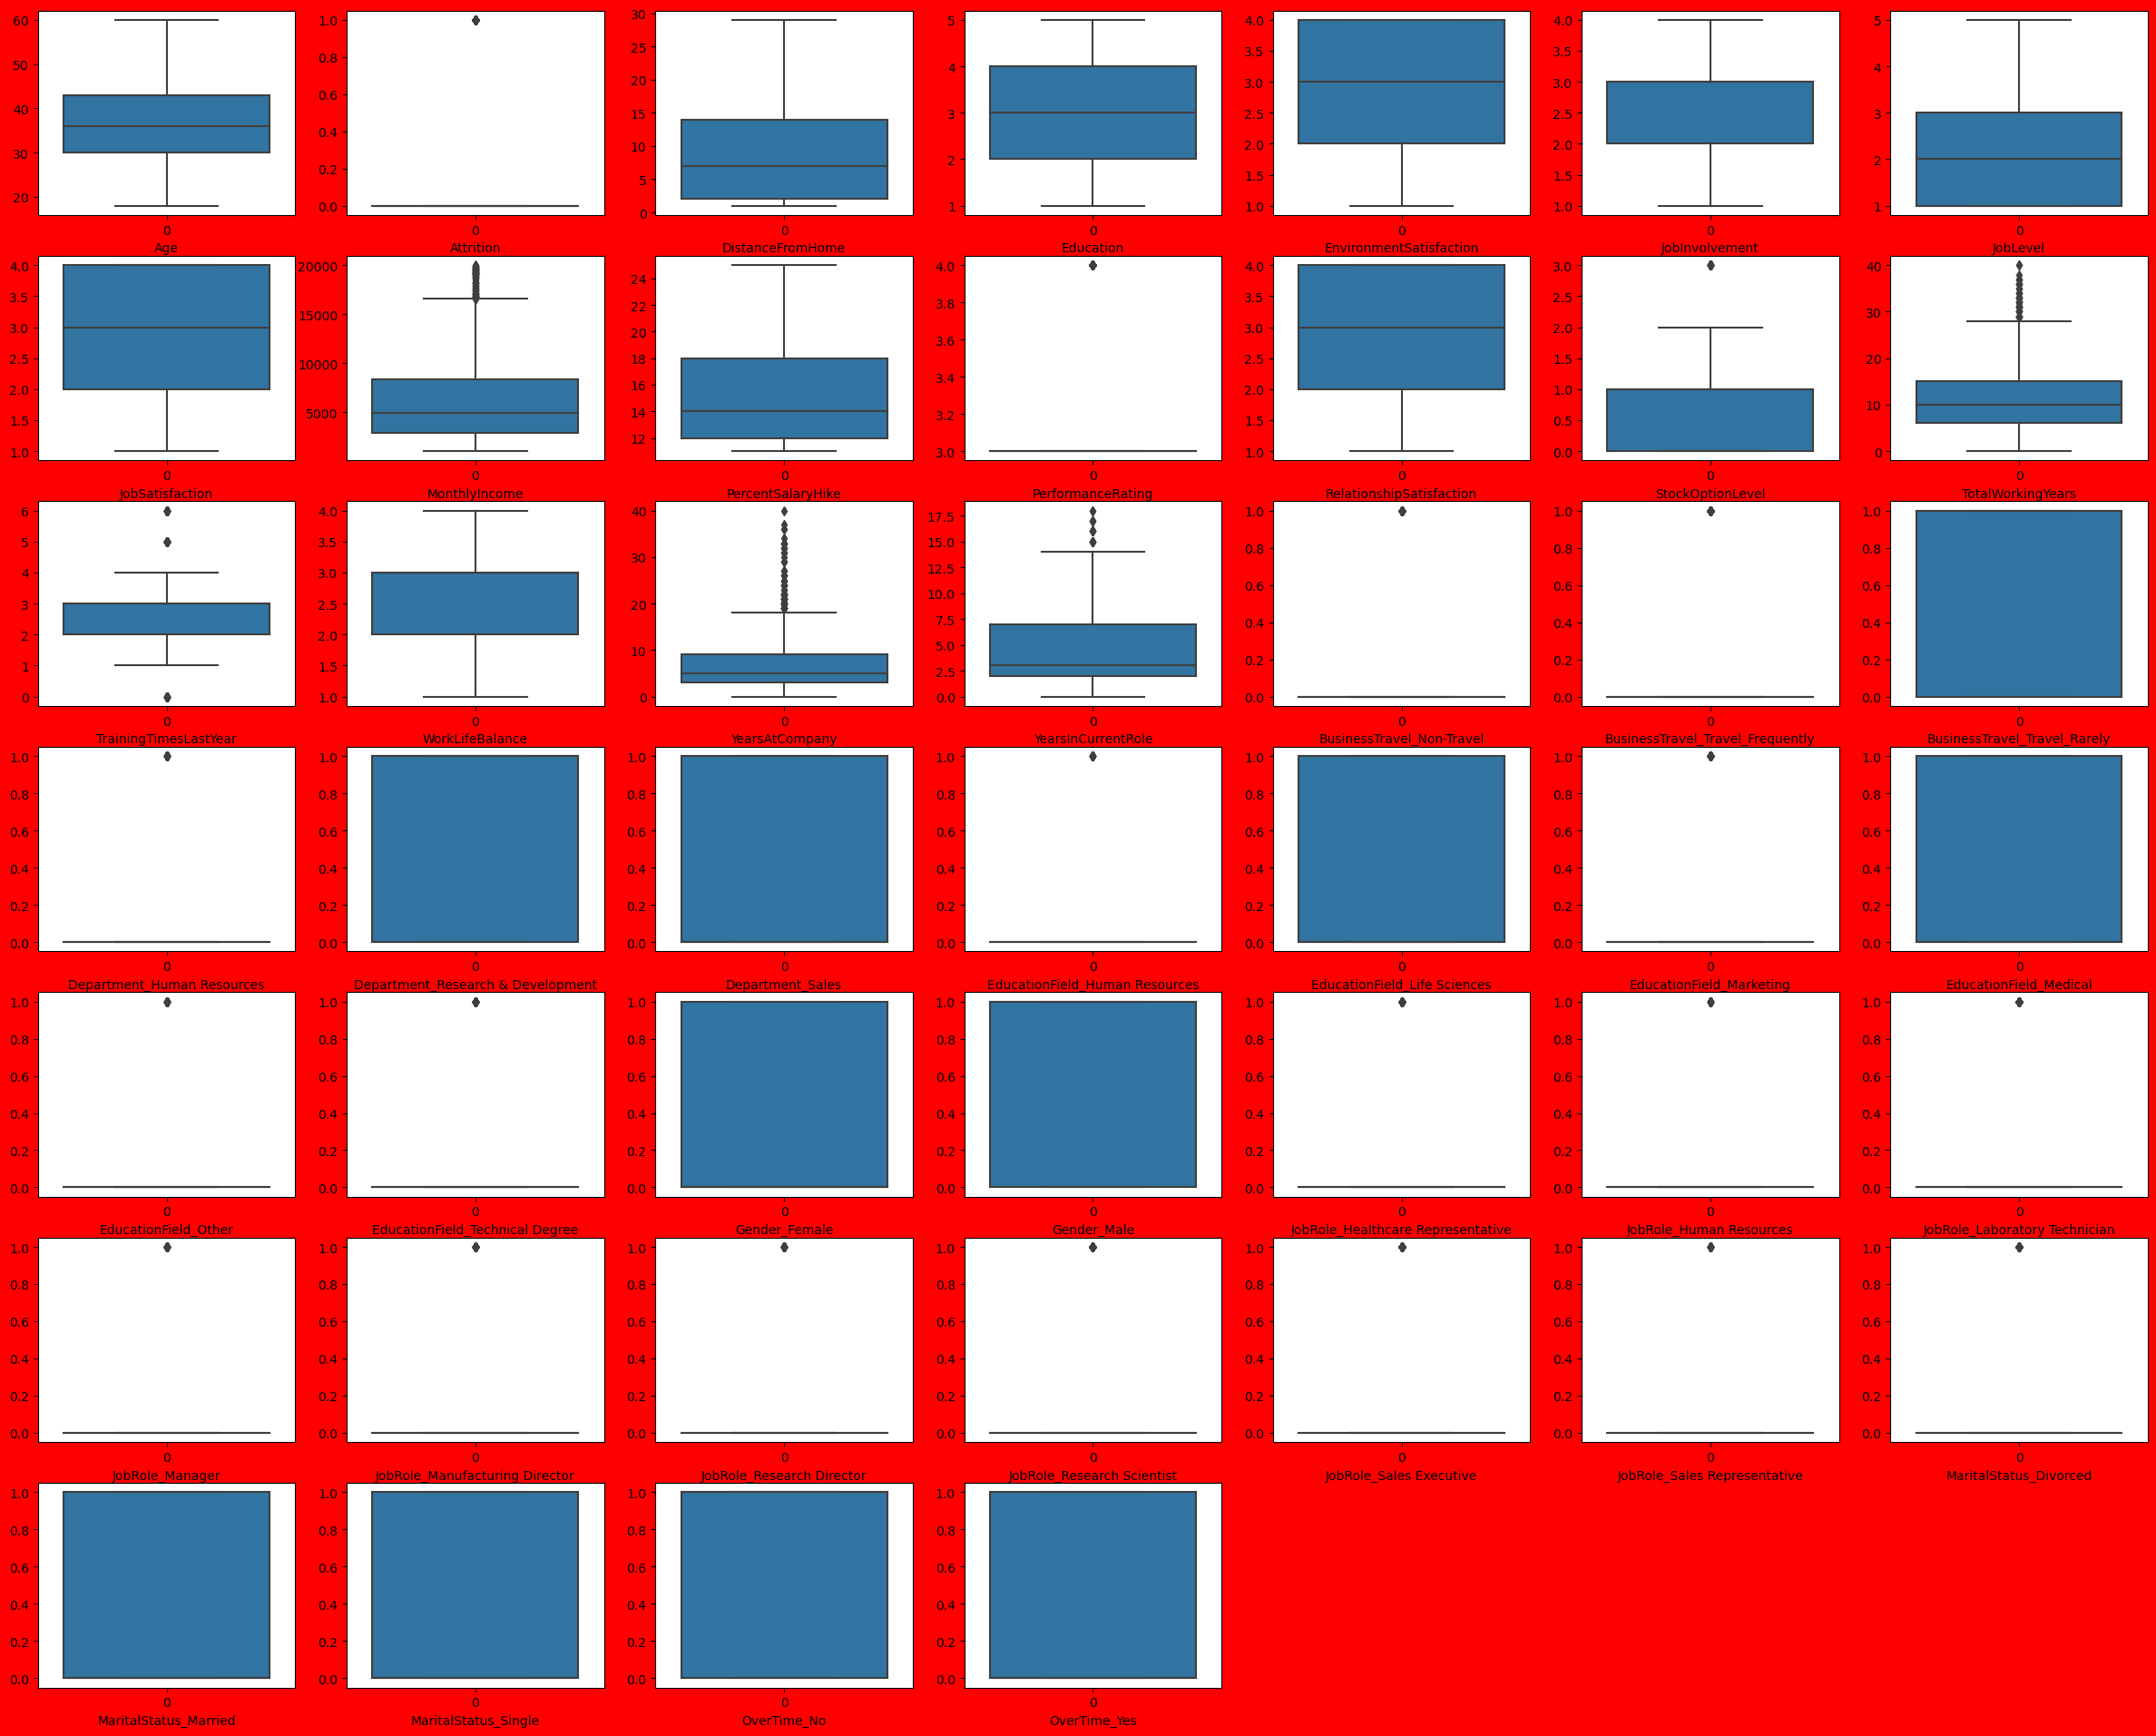

In [26]:
plt.figure(figsize=(30,24), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=50:
        ax = plt.subplot(7,7,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        
        
    plotnumber+=1
plt.show()


In [27]:
data.skew()

Age                                  0.413286
Attrition                            1.844366
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
BusinessTravel_Non-Travel            2.632066
BusinessTravel_Travel_Frequently     1.595067
BusinessTravel_Travel_Rarely        -0.923992
Department_Human Resources        

In [29]:
data['JobRole_Sales Representative']=np.cbrt(data['JobRole_Sales Representative'])
data['JobRole_Research Director']=np.cbrt(data['JobRole_Research Director'])
data['JobRole_Manager']=np.cbrt(data['JobRole_Manager'])
data['JobRole_Human Resources']=np.cbrt(data['JobRole_Human Resources'])
data['EducationField_Other']=np.cbrt(data['EducationField_Other'])
data['EducationField_Human Resources']=np.cbrt(data['EducationField_Human Resources'])
data['Department_Human Resources']=np.cbrt(data['Department_Human Resources'])
data['BusinessTravel_Non-Travel']=np.cbrt(data['BusinessTravel_Non-Travel'])


In [30]:
data.skew() #successfully removed the skewness

Age                                  0.413286
Attrition                            1.844366
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
BusinessTravel_Non-Travel            2.632066
BusinessTravel_Travel_Frequently     1.595067
BusinessTravel_Travel_Rarely        -0.923992
Department_Human Resources        

In [31]:
data.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,15.209524,...,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,0.717007,0.282993
std,9.135373,0.367863,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,3.659938,...,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.450606,0.450606
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
y = data['Attrition']
x = data.drop(columns = ['Attrition'])

In [33]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # We are able to tackle the issue of biasness through standard scalar method


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [36]:
#training the model

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state = 40)


In [39]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier


In [40]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))


0.8639455782312925
[[364   6]
 [ 54  17]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       370
           1       0.74      0.24      0.36        71

    accuracy                           0.86       441
   macro avg       0.80      0.61      0.64       441
weighted avg       0.85      0.86      0.83       441



Here from the extratreesclassifier we could see that the accuracy score of the test data is 86% which is a good score.

In [41]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8639455782312925
[[366   4]
 [ 56  15]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       370
           1       0.79      0.21      0.33        71

    accuracy                           0.86       441
   macro avg       0.83      0.60      0.63       441
weighted avg       0.85      0.86      0.83       441



Here from the RandomForestClassifier we could see that the accuracy score of the test data is 86% which is a good score.

In [42]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f'Accuracy score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
    
    elif train==False:
        pred = clf.predict(x_test) #
        print(f'Accuracy score: {accuracy_score(y_test, pred) * 100:.2f}%')
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))


In [44]:
metric_score(RFC, x_train, x_test, y_train, y_test, train=True) #training score
metric_score(RFC, x_train, x_test, y_train, y_test, train=False) #testing score


Accuracy score: 100.00%
Accuracy score: 86.39%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       370
           1       0.79      0.21      0.33        71

    accuracy                           0.86       441
   macro avg       0.83      0.60      0.63       441
weighted avg       0.85      0.86      0.83       441



In [45]:
metric_score(ET, x_train, x_test, y_train, y_test, train=True) #training score
metric_score(ET, x_train, x_test, y_train, y_test, train=False) #testing score


Accuracy score: 100.00%
Accuracy score: 86.39%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       370
           1       0.74      0.24      0.36        71

    accuracy                           0.86       441
   macro avg       0.80      0.61      0.64       441
weighted avg       0.85      0.86      0.83       441



In [46]:
import joblib
joblib.dump(RFC, 'Hr_Analytics.pkl') #saving the model


['Hr_Analytics.pkl']

In [47]:
RFC = joblib.load('Hr_Analytics.pkl')

prediction = RFC.predict(x_test)
prediction


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a
data


,Predicted,Actual
0,0,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
436,0,1
437,0,0
438,0,0
439,0,0


Key insights from this project and conclusion

With the help of HR analytics we could understand the importance of each role in our organization by evaluating key factors such as: Is the job necessary? etc... We colud reduce the employee attrition by keeping the job descriptions current and by analyzing all the factors that may impact the position.
At the start of this project, we identified the importance of talent retention for a company and collected a dataset on employee information and attrition. We then completed an exploratory data analysis, creating heatmaps to show correlations between variables, and visualizations to understand the demographics and features of attrited employees. we built a model that helps predict employee attrition with an accuracy of 86%. Then we concluded that there are some variables that are important factors in an employee’s decision to attrit such as education fields, job roles, satisfaction, etc. We also developed implications for companies with actions to consider in order to prevent future loss of talent.

